In [10]:
import os,struct

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from PIL import Image
from utils.constants import HIRAGANA

In [11]:
BASE_PATH = './data/etl7'
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'
FILES = ['ETL7LC_1']
RECORDS_NB = [9600, 7200, 9600, 7200]
RECORD_LENGTH = 2052 # bytes
WIDTH = 64
HEIGHT = 63
COLUMNS_LABELS = ['hiragana','image_data']

In [12]:
records_list = []

for filename in FILES:
    file_index = FILES.index(filename)
    records_nb = RECORDS_NB[file_index]
    count = 0
    f = open(f'{BASE_PATH}/{filename}', 'rb')

    while count <= records_nb:
        record_string = f.read(RECORD_LENGTH)

        if len(record_string) < RECORD_LENGTH:
            break
            
        record = struct.unpack(UNPACK_STRING, record_string)
        
        phonetic = record[1].decode('ascii')
        hiragana = HIRAGANA[phonetic]
        
        record_data = [hiragana,record[18]]
        
        records_list.append(record_data)     
        count+=1

    f.close()

In [13]:
df = pd.DataFrame(records_list, columns=COLUMNS_LABELS)
df.head()

,hiragana,image_data
0,あ,"b'2#3\x133#""""!""""""2#\x12""3""23\x122#""\x13\x123""3..."
1,あ,"b'3334332""#3""2C""#2#""!3""2#""""""""""23C233CC33C33322..."
2,あ,"b'32333333#22""3""2""#2""#""2#2""#33#3332233#233""22\..."
3,あ,"b'C4B33332232#33##3""###3""2#3243333D3C433#2232$..."
4,あ,"b'2223""2!""""""!""#""""""22""""\x12!""!!""#\x12""""23312#""""..."


In [14]:
len(HIRAGANA)

48

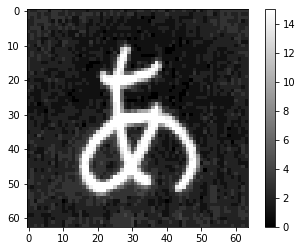

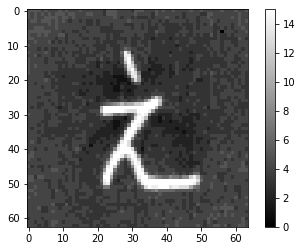

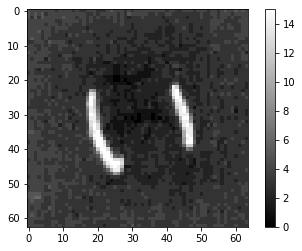

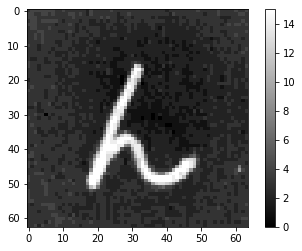

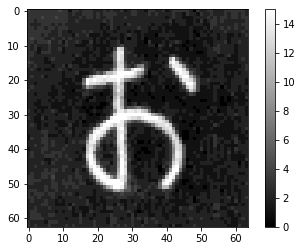

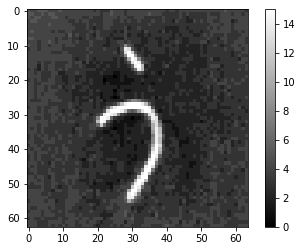

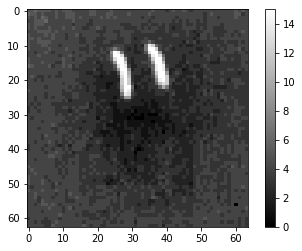

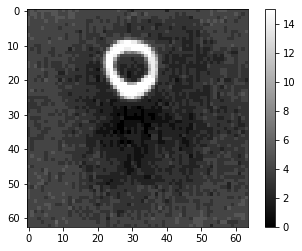

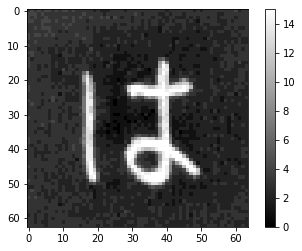

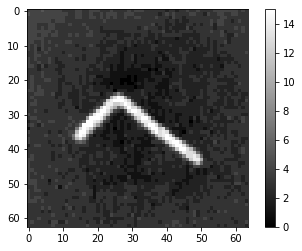

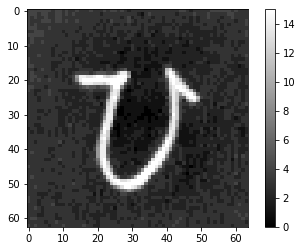

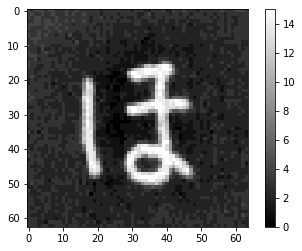

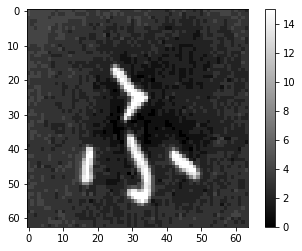

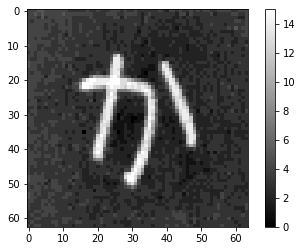

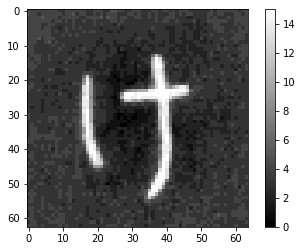

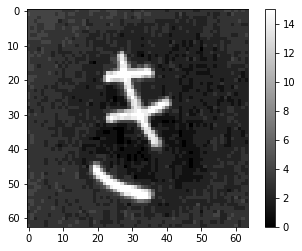

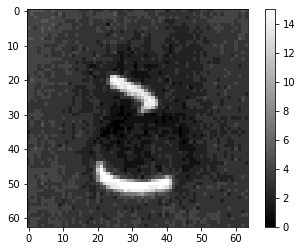

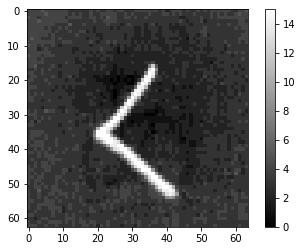

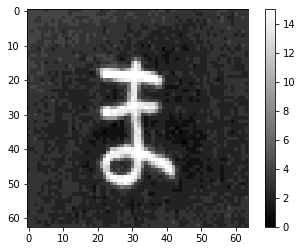

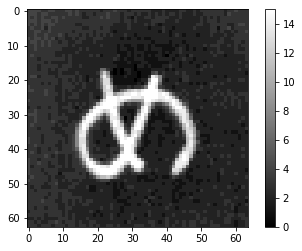

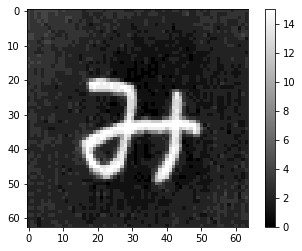

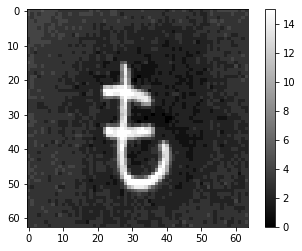

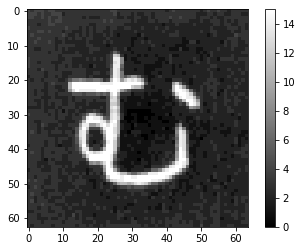

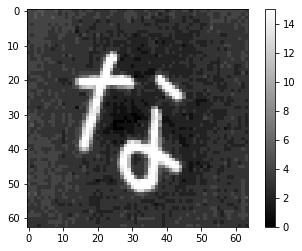

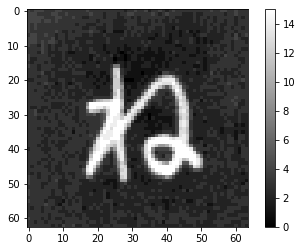

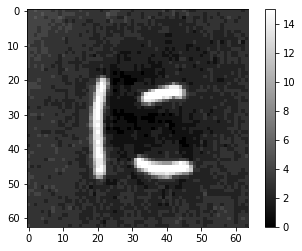

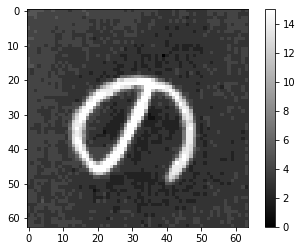

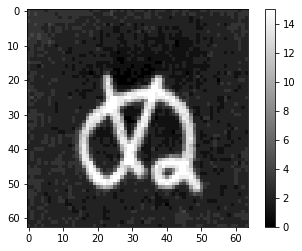

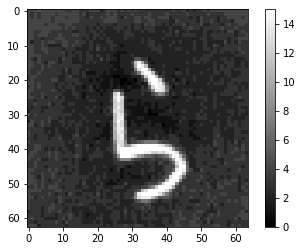

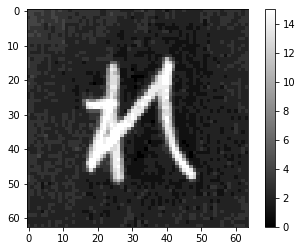

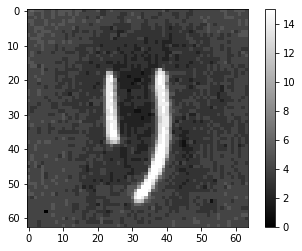

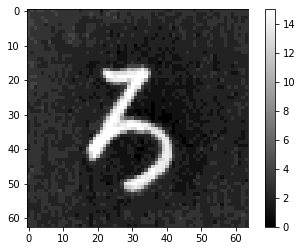

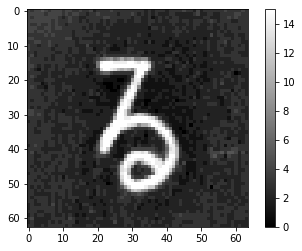

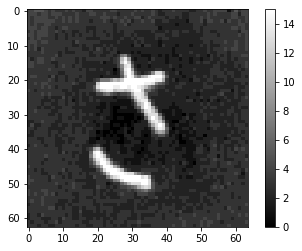

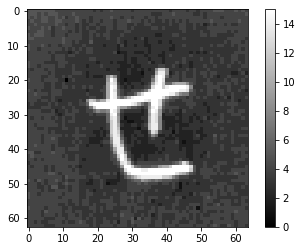

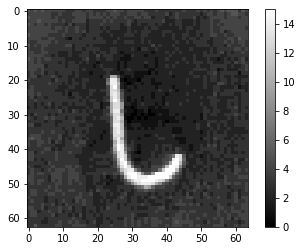

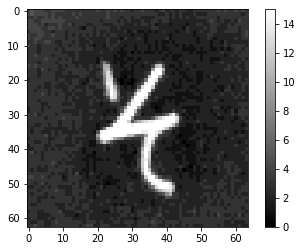

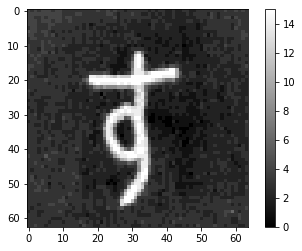

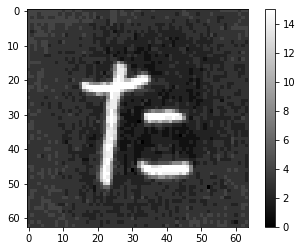

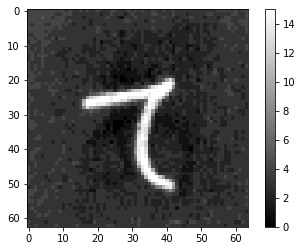

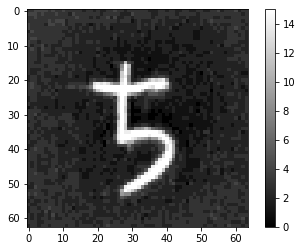

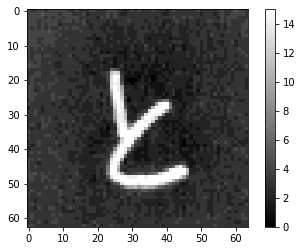

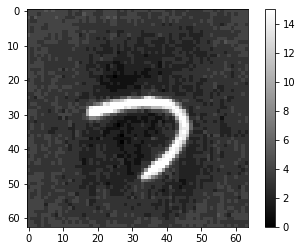

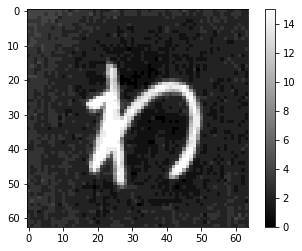

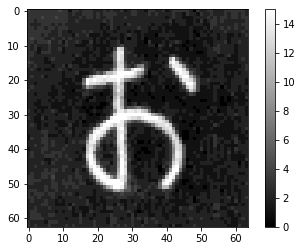

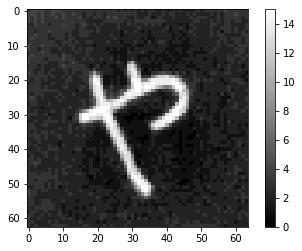

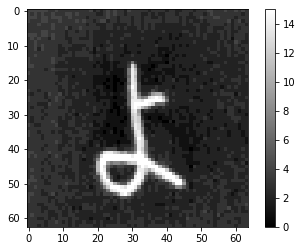

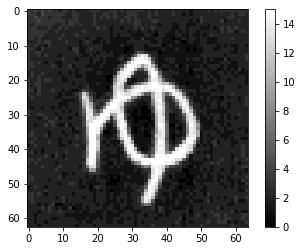

In [15]:
size = len(HIRAGANA) / 2
hiraganas = list(HIRAGANA.values())

for H in hiraganas:
    i = hiraganas.index(H)
    char, img_data = df[df['hiragana'] == H].values[0]
    img = np.array(Image.frombytes('F', (WIDTH, HEIGHT), img_data, 'bit', 4))
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.colorbar()
    plt.show()

In [16]:
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

ModuleNotFoundError: No module named 'keras'

In [21]:
import numpy as np

ar = np.array([
    [1, 2, 3],
    [4, 5, 6],
])

np.shape(ar)

ar = np.reshape(ar, 6)

np.shape(ar)

array([1, 2, 3, 4, 5, 6])

In [31]:
df['image_data'][0]

npa = np.array(Image.frombytes('F', (WIDTH, HEIGHT), img_data, 'bit', 4))
np.shape(npa)

npa = np.reshape(npa, HEIGHT*WIDTH)
np.shape(npa)

npa

array([3., 3., 4., ..., 2., 2., 2.], dtype=float32)